# JSON AND ARFF OF AIRLINE DATA

_by Joey Tuason_

This python script will load the json description file of the airline dataset savedrom [OpenML](https://www.openml.org/search?type=data&sort=runs&status=active).

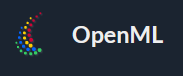 

The json desciption file contains the url of the arff file that we will use to load the data.

Source: https://www.openml.org/search?type=data&sort=qualities.NumberOfInstances&status=active&id=42728

## Introduction

In preparation for any data science class, it would be wise to have equipped available datasets and have an idea how they look like. For my current data visualization class this coming Saturday, April 30, most of my candidates would be from the OpenML website.

## Methodology

1. We look into datasets available in the OpenML site and download their descriptions, saved as JSON.
2. Load the JSON files.
3. Load the ARFF files using a package in scipy and get its info to have an assessment on which data preferred for the data visualization class.

## Load Libraries

In [1]:
from scipy.io import arff # package needed to load the arff file
import urllib.request
import io
import pandas as pd

## Load the Json File

In [2]:
df = pd.read_json('42728.json')

In [3]:
# check how it looks like
df

,data_set_description
collection_date,2013
default_target_attribute,DepDelay
description,Airlines Departure Delay Prediction (Regressio...
description_version,1
file_id,22044760
format,ARFF
id,42728
licence,CC0
md5_checksum,ddf153767b728faa717c2ae0063c7987
minio_url,http://openml1.win.tue.nl/dataset42728/dataset...


## Load Dataset from URL

In [4]:
# check the url
url = df.loc['url','data_set_description']
url

'https://old.openml.org/data/v1/download/22044760/Airlines_DepDelay_10M.arff'

In [5]:
ftpstream = urllib.request.urlopen(url)
data, meta = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))

In [6]:
data

array([(  2., 10., 30., 5.,  900., 1152., b'AA', b'JFK', b'LAX', 2475.),
       ( 12., 10.,  4., 7., 1300., 1535., b'AA', b'LAX', b'HNL', 2556.),
       (  8., 10., 11., 7., 1300., 1535., b'AA', b'LAX', b'HNL', 2556.),
       ...,
       ( -6.,  7., 31., 3., 1050., 1332., b'YV', b'PNS', b'CLT',  488.),
       ( 21.,  7., 31., 3., 1721., 1854., b'YV', b'PWM', b'ORD',  900.),
       (-10.,  7., 31., 3.,  800.,  912., b'YV', b'TUS', b'PHX',  110.)],
      dtype=[('DepDelay', '<f8'), ('Month', '<f8'), ('DayofMonth', '<f8'), ('DayOfWeek', '<f8'), ('CRSDepTime', '<f8'), ('CRSArrTime', '<f8'), ('UniqueCarrier', 'S6'), ('Origin', 'S3'), ('Dest', 'S3'), ('Distance', '<f8')])

In [7]:
meta

Dataset: trainr_10M
	DepDelay's type is numeric
	Month's type is numeric
	DayofMonth's type is numeric
	DayOfWeek's type is numeric
	CRSDepTime's type is numeric
	CRSArrTime's type is numeric
	UniqueCarrier's type is nominal, range is ('9E', 'AA', 'AS', 'B6', 'CO', 'DH', 'DL', 'EA', 'EV', 'F9', 'FL', 'HA', 'HP', 'KH', 'ML (1)', 'MQ', 'NW', 'OH', 'OO', 'PA (1)', 'PI', 'PS', 'TW', 'TZ', 'UA', 'US', 'VX', 'WN', 'XE', 'YV')
	Origin's type is nominal, range is ('ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY', 'ADK', 'ADQ', 'AEX', 'AGS', 'AKN', 'ALB', 'ALO', 'AMA', 'ANC', 'ANI', 'APF', 'APN', 'ART', 'ASE', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZA', 'AZO', 'BDL', 'BET', 'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BJI', 'BKG', 'BLI', 'BMI', 'BNA', 'BOI', 'BOS', 'BPT', 'BQK', 'BQN', 'BRD', 'BRO', 'BRW', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'CAE', 'CAK', 'CCR', 'CDC', 'CDV', 'CEC', 'CHA', 'CHO', 'CHS', 'CIC', 'CID', 'CIU', 'CLD', 'CLE', 'CLL', 'CLT', 'CMH', 'CMI', 'CMX', 

In [8]:
meta.names()

['DepDelay',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'UniqueCarrier',
 'Origin',
 'Dest',
 'Distance']

## The Airlines Dataset

In [9]:
Airlines_DepDelay_10M = pd.DataFrame(data,columns=meta.names())
Airlines_DepDelay_10M

,DepDelay,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,Origin,Dest,Distance
0,2.0,10.0,30.0,5.0,900.0,1152.0,b'AA',b'JFK',b'LAX',2475.0
1,12.0,10.0,4.0,7.0,1300.0,1535.0,b'AA',b'LAX',b'HNL',2556.0
2,8.0,10.0,11.0,7.0,1300.0,1535.0,b'AA',b'LAX',b'HNL',2556.0
3,-1.0,10.0,29.0,4.0,2310.0,613.0,b'AA',b'HNL',b'LAX',2556.0
4,0.0,10.0,3.0,6.0,2035.0,2110.0,b'AA',b'OGG',b'HNL',100.0
...,...,...,...,...,...,...,...,...,...,...
9999995,-6.0,7.0,31.0,3.0,735.0,858.0,b'YV',b'PHX',b'BUR',369.0
9999996,2.0,7.0,31.0,3.0,855.0,1349.0,b'YV',b'PHX',b'DSM',1149.0
9999997,-6.0,7.0,31.0,3.0,1050.0,1332.0,b'YV',b'PNS',b'CLT',488.0
9999998,21.0,7.0,31.0,3.0,1721.0,1854.0,b'YV',b'PWM',b'ORD',900.0


In [10]:
Airlines_DepDelay_10M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   DepDelay       float64
 1   Month          float64
 2   DayofMonth     float64
 3   DayOfWeek      float64
 4   CRSDepTime     float64
 5   CRSArrTime     float64
 6   UniqueCarrier  object 
 7   Origin         object 
 8   Dest           object 
 9   Distance       float64
dtypes: float64(7), object(3)
memory usage: 762.9+ MB
